# Astronomy 2 (PHY1107) - Report Assignment 

Create an observatonal H-R diagram using supplied Gaia survey data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import math
import numpy as np
import pandas as pd

In [2]:
brightest_df = pd.read_csv('../data/Brightest_stars_GAIA_Report.csv')
nearest_df = pd.read_csv('../data/Nearest_stars_GAIA_Report.csv')

In [3]:
brightest_df

,GAIA_source_id,RA (deg),Dec (deg),parallax,GAIA_g_app_mag,GAIA_bp_rp
0,418551920284673000,10.127242,56.537189,14.090976,1.942524,1.143484
1,4357027756659690000,243.586211,-3.694968,20.411292,2.016425,1.563310
2,4993479684438430000,6.572156,-42.307820,39.918258,2.089977,1.269482
3,4038055447778230000,274.406091,-36.762429,23.885852,2.116495,1.827267
4,1279798794197260000,221.246486,27.074316,13.826673,2.183352,1.184006
...,...,...,...,...,...,...
194,872128538640246000,113.980461,26.895273,12.876057,3.386471,1.817842
195,5537302945910490000,118.054231,-40.575749,8.983793,3.393327,1.263192
196,6801963487915160000,312.955332,-26.919144,5.897469,3.399040,1.850532
197,4871775051598300000,66.009555,-34.016634,11.126967,3.400128,1.686055


We need **Absolute Magnitude (M)**, and we know:

- apparent magnitude (m)
- parallax, in milliarcseconds (mas)

### Related equations

Distance modulus:
$$
m - M = 5 log_{10} d - 5
$$

Reference: https://www.phys.ksu.edu/personal/wysin/astro/magnitudes.html

$$
\therefore
M = m - 2.5 \log{ ((\frac{d}{10}) ^ 2) }
$$

Parallax angle $p$, in arcseconds:
$$d = \frac{1}{p}$$

Accounting for supplied `mas` units:
$$
d = \frac{1}{p*10^{-3}}
$$

In [4]:
def get_abs_mag(mas_pc, m):
    """
    Calculate Absolute Magnitudes (M), from Apparent 
    Magnitudes and milliparsecs parallax values.
    """
    d = 1 / (mas_pc * 10E-3)
    return m - 2.5 * np.log10((d / 10) ** 2)

In [17]:
def plot_single(x, y, title):
    """
    Make a single scatter plot H-R diagram
    """
    plt.figure(figsize=(20,10))

    area = 200
    plt.scatter(x, y, s=area, marker="o")

    plt.title(title, fontsize=30)
    plt.xlabel('GAIA colours ($G_{BP} - G_{RP}$)', fontsize=20)
    plt.ylabel('Absolute Magnitude (M)', fontsize=20)

    plt.xlim([-1,6])
    plt.ylim([0, 26])

    plt.gca().invert_yaxis()

    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', labelsize=16)

In [18]:
def plot_dual(x1, y1, x2, y2,):
    """
    Make a dual scatter plot H-R diagram
    """
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(111)

    ax1.scatter(x1, y1, s=150, marker="s", label='Brightest')
    ax1.scatter(x2, y2, s=120, marker="o", label='Nearest')
    plt.legend(loc='lower left', fontsize=20)

    plt.title('Observational H-R diagram of Gaia 200 Nearest and 200 Brightest Stars', fontsize=25)
    plt.xlabel('Gaia colour ($G_{BP} - G_{RP}$)', fontsize=20)
    plt.ylabel('Absolute Magnitude (M)', fontsize=20)

    plt.gca().invert_yaxis()

    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', labelsize=16)

# Get ABS Mags

In [19]:
M_b = get_abs_mag(
    brightest_df['parallax'],
    brightest_df['GAIA_g_app_mag']
)

M_n = get_abs_mag(
    nearest_df['parallax'],
    nearest_df['GAIA_g_app_mag']
)

# Plot both

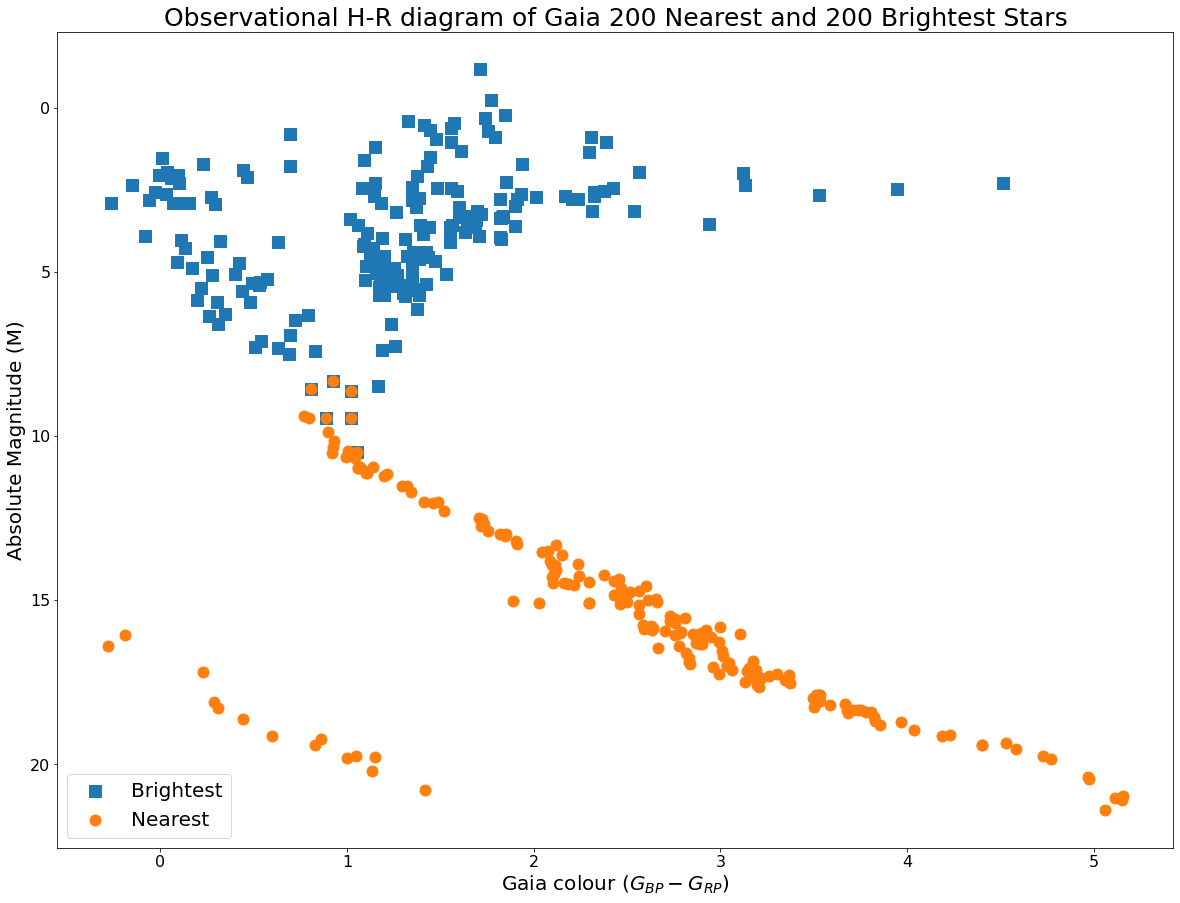

In [20]:
plot_dual(
    brightest_df['GAIA_bp_rp'], 
    M_b,
    nearest_df['GAIA_bp_rp'], 
    M_n
)

## Do Brightest Plot

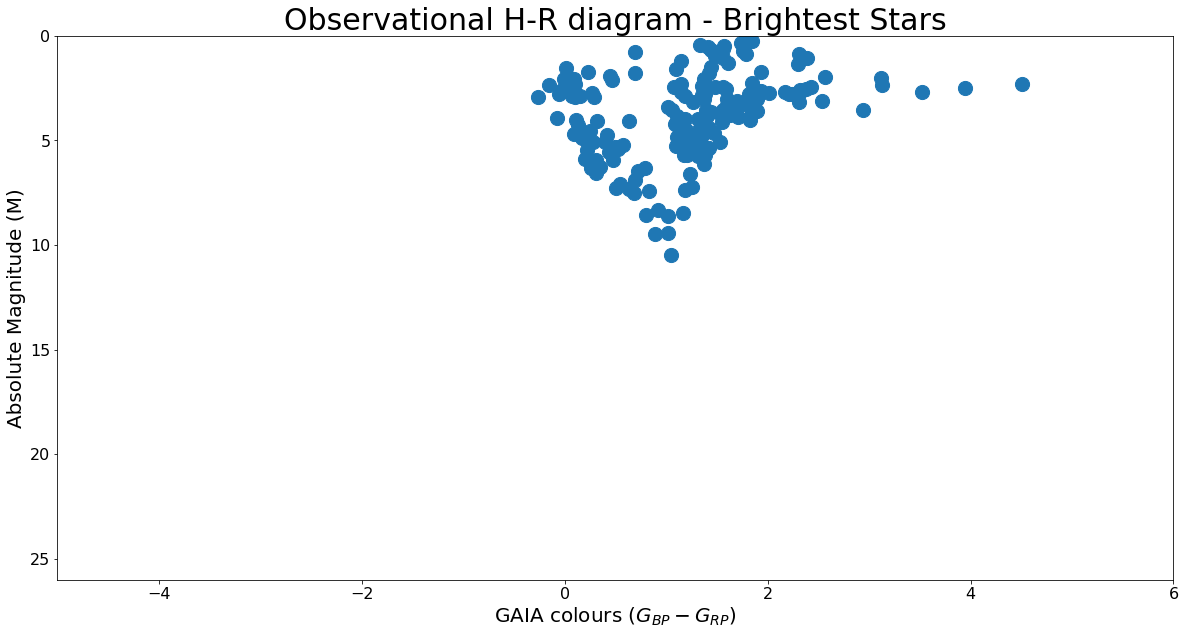

In [21]:
plot_single(
    brightest_df['GAIA_bp_rp'], 
    M_b,
    'Observational H-R diagram - Brightest Stars'
)

## Do Nearest Plot

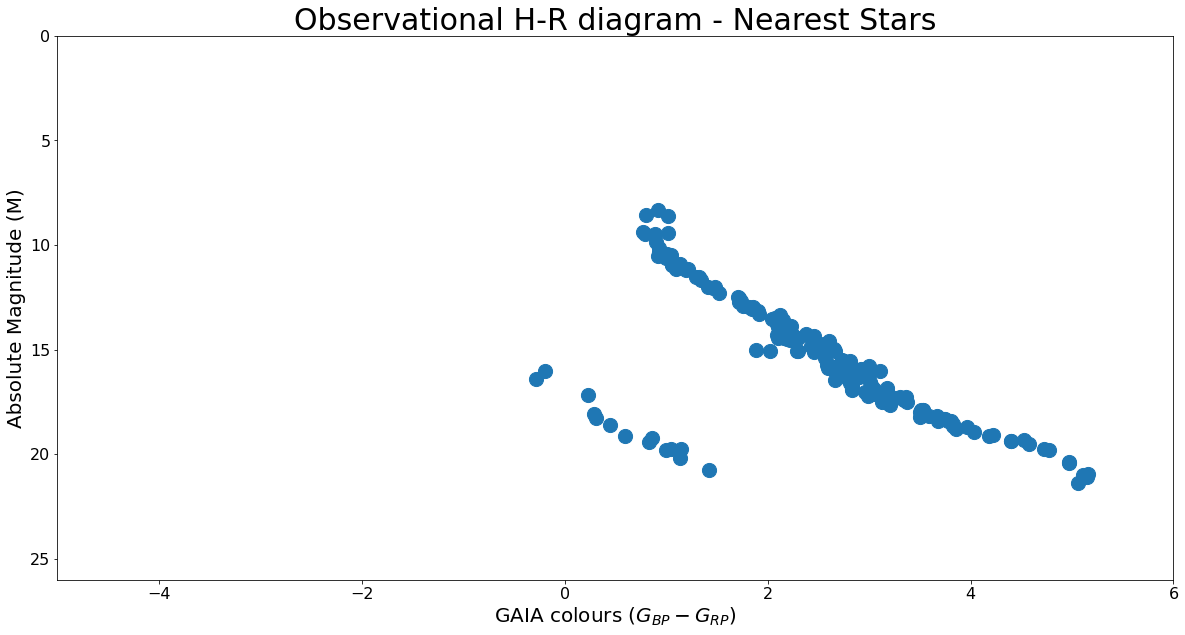

In [16]:
plot_single(
    nearest_df['GAIA_bp_rp'], 
    M_n,
    'Observational H-R diagram - Nearest Stars'
)